In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
dataframe=pd.read_csv("adm_data.csv")

In [3]:
dataframe

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
dataframe['CGPA'].unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


# Data Cleaning
Checking for missing values

<AxesSubplot:>

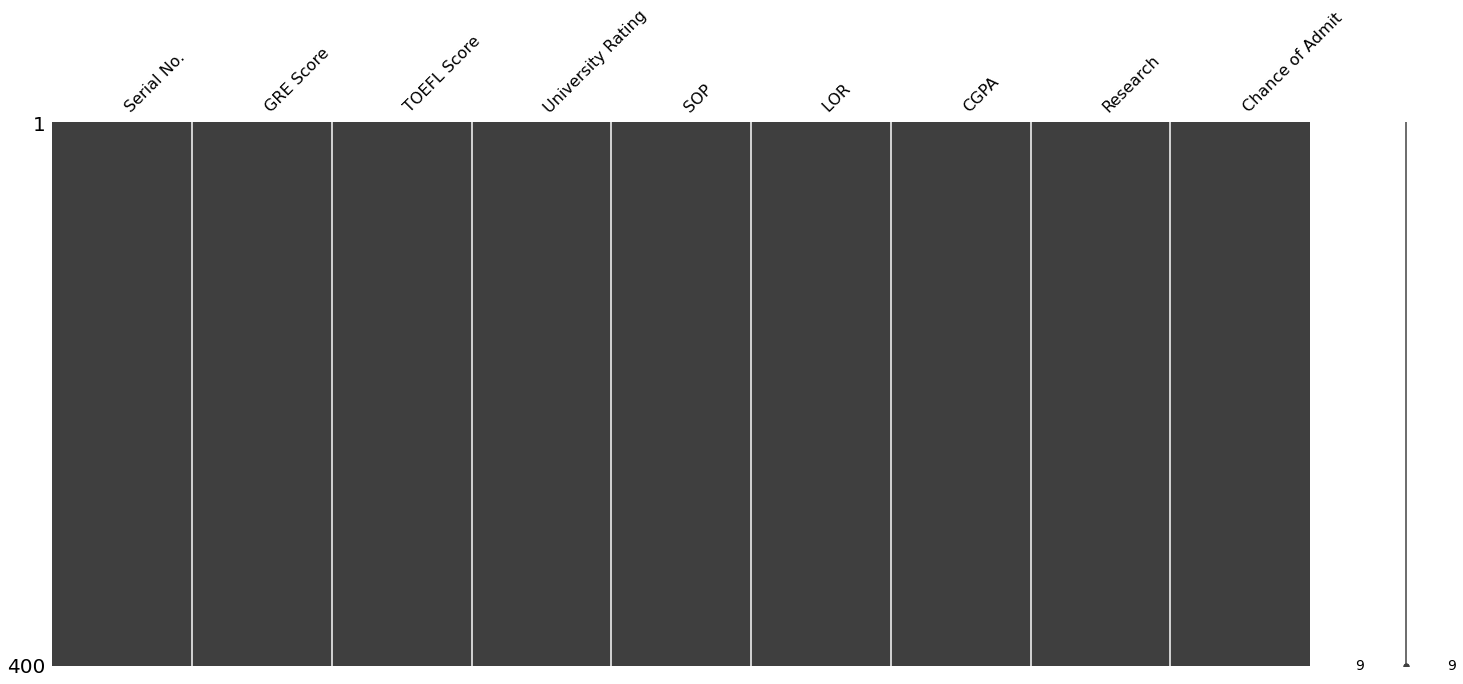

In [6]:
import missingno as msno 
msno.matrix(dataframe)

In [7]:
campaign=dataframe.groupby("University Rating").sum()["CGPA"]

In [8]:
campaign

University Rating
1     201.39
2     875.66
3    1137.45
4     667.60
5     557.47
Name: CGPA, dtype: float64

# Rating of University according to CGPA

<AxesSubplot:xlabel='University Rating'>

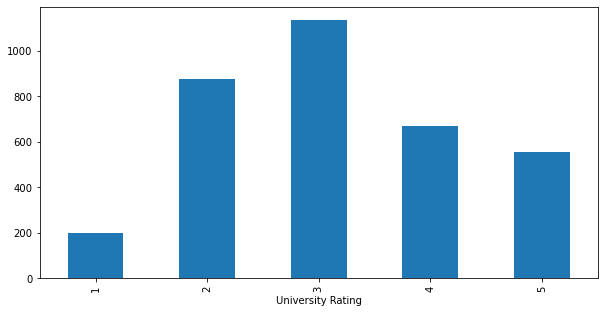

In [9]:
campaign.plot.bar(x='University Rating', y='CGPA', figsize=(10,5))

# Checking The Correlation Using Heatmap******

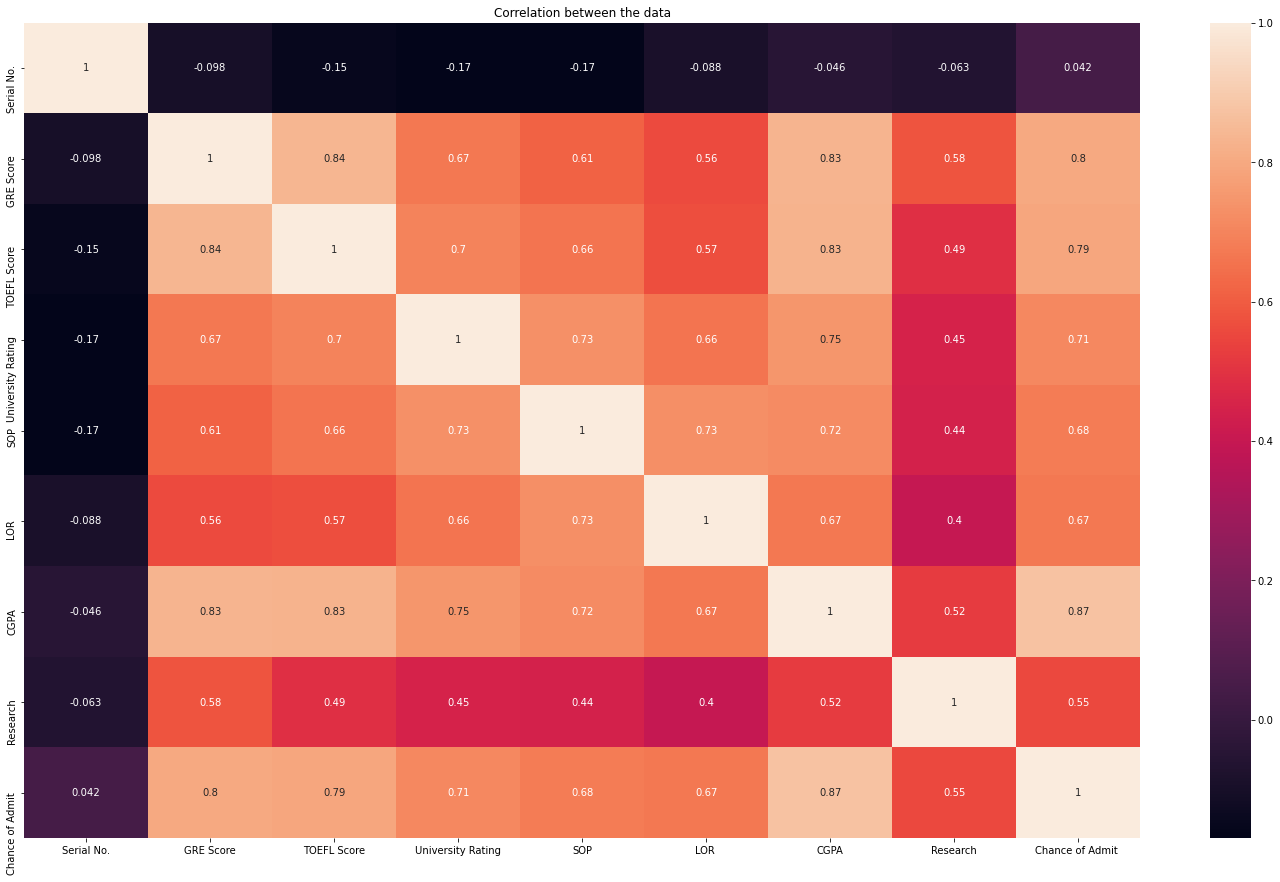

In [10]:
plt.figure(figsize=(25,15))
Data_for_Admission = dataframe.corr()

# Ploty 
sns.heatmap(Data_for_Admission, annot=True, cmap='rocket').set(
    title = "Correlation between the data"
)

# Show
plt.xticks(rotation=360)
plt.show()


# Checking The Histogram ploting

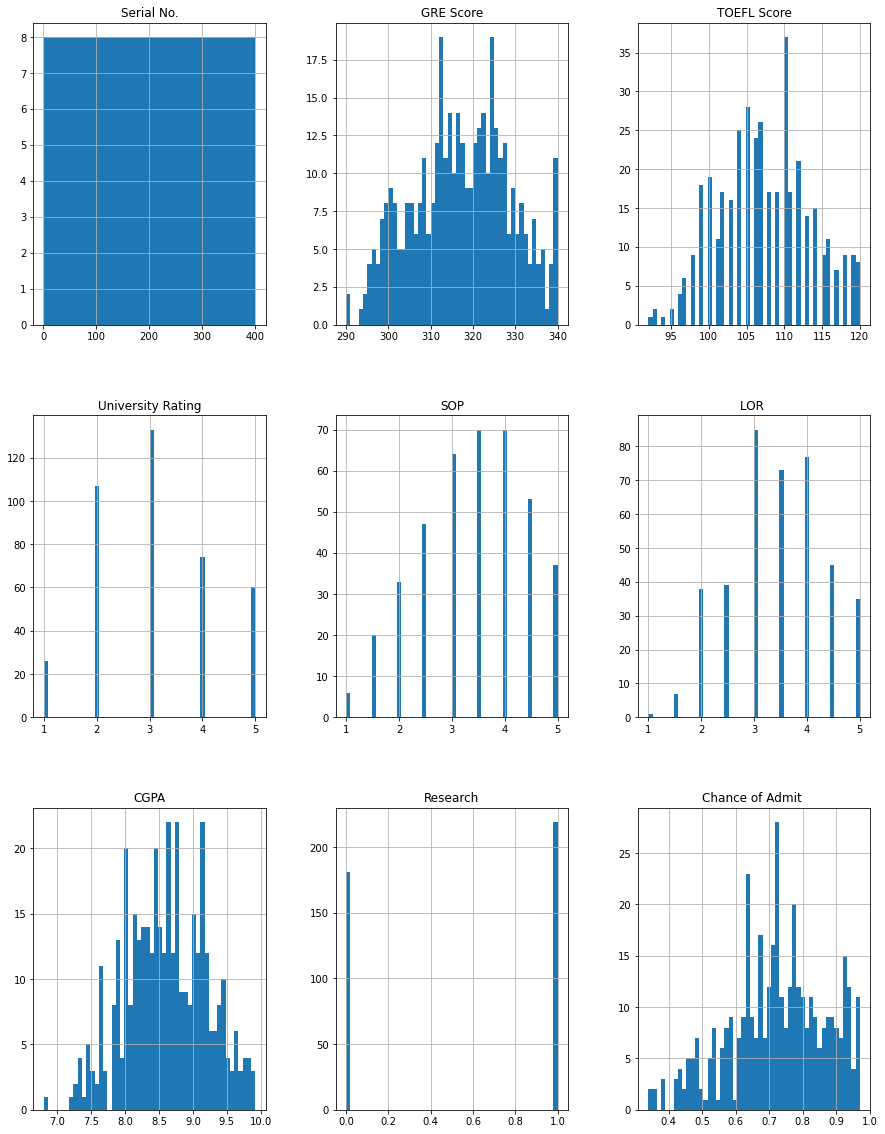

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
dataframe.hist(bins=50,figsize=(15,20))
plt.show()


In [12]:
x = dataframe[['TOEFL Score','CGPA','University Rating','GRE Score','Research']]
y = dataframe['Chance of Admit ']


# Training and Testing Data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


# Training the Model

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train,y_train)
LinearRegression()


0.7937073594050603

# Predicting Test Data

In [ ]:
y_pred = lm.predict(X_test)
lm.score(x,y)

# Evaluating the Model

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Erro

In [16]:
from sklearn import metrics

In [17]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   0.04708029855694955
MSE :   0.004368529152885586
RMAE :   0.06609484966989172


# Residuals

C:\Users\Ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

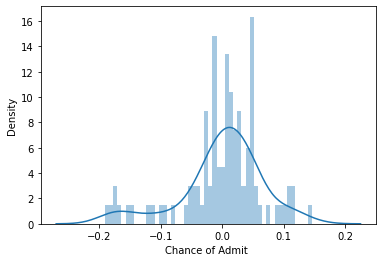

In [18]:
sns.distplot(y_test - y_pred,bins=50)